In [1]:
!pip install arviz==0.6.1
!pip install pymc3==3.8
!pip install Theano==1.0.4
import numpy as np
import pymc3 as pm
from pymc3 import Model, Normal, Slice, sample, traceplot
from pymc3.distributions import Interpolated

You should consider upgrading via the 'c:\python\python38\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\python\python38\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\python\python38\python.exe -m pip install --upgrade pip' command.
WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
c:\python\python38\lib\site-packages\theano\configdefaults.py:560: UserWarning: DeprecationWarning: there is no c++ compiler.This is deprecated and with Theano 0.11 a c++ compiler will be mandatory
  warnings.warn("DeprecationWarning: there is no c++ compiler."
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
%matplotlib inline
import matplotlib.pyplot as plt  # Matlab-style plotting
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)


from scipy import stats
from scipy.stats import norm, skew #for some statistics


pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x)) #Limiting floats output to 3 decimal points



In [3]:
data = pd.read_csv('C:/Users/abhas/Downloads/dataf.csv')
data



,gdp_pwt_cur_o,pop_d,pop_o,hostility_level_o,hostility_level_d,common_language,polity_o,polity_d,sanction_threat,sanction_threat_trade,...,Year,Unit,Value,capital_const_d,capital_const_o,capital_cur_d,capital_cur_o,gdp_pwt_const_d,gdp_pwt_const_o,gdp_pwt_cur_d
0,35137.199,16.441,16.441,0,0,1,-3,-3,0,0,...,1998,1000 US$,7,528826.625,528826.625,215671.938,215671.938,32316.541,32316.541,35137.199
1,37199.262,16.983,16.983,0,0,1,-3,-3,0,0,...,1999,1000 US$,33,520588.531,520588.531,216432.297,216432.297,34724.883,34724.883,37199.262
2,43236.754,17.573,17.573,0,0,1,-2,-2,0,0,...,2000,1000 US$,90,515457.906,515457.906,217199.672,217199.672,39094.168,39094.168,43236.754
3,46261.938,18.203,18.203,0,0,1,-2,-2,0,0,...,2001,1000 US$,199,514938.656,514938.656,221730.812,221730.812,42965.863,42965.863,46261.938
4,56802.926,18.866,18.866,0,0,1,-2,-2,0,0,...,2002,1000 US$,103,521208.625,521208.625,232837.250,232837.250,51902.344,51902.344,56802.926
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2387,379305.594,4.625,37.889,0,0,0,8,5,0,0,...,2007,tonnes,23,67997.438,1379035.000,69527.195,1241655.375,16104.050,379488.250,15624.440
2388,408541.031,4.579,38.309,0,0,0,8,5,0,0,...,2008,tonnes,7,68895.328,1384816.000,73859.242,1247295.375,18166.865,411725.469,17661.451
2389,446114.688,4.533,38.729,0,0,0,8,7,0,0,...,2009,tonnes,16,69997.055,1410547.500,79506.664,1303330.125,19701.002,450377.656,19187.031
2390,469033.500,18.939,37.057,0,0,1,8,2,0,0,...,2015,tonnes,59,498731.688,1377294.750,253751.922,1315796.500,60862.609,471358.000,61227.000


In [4]:
y=data['Value']

In [5]:
df5 = data[data['polity_d'] < 0]
df5.shape

(706, 41)

In [6]:
train = data.iloc[ :df5.shape[0]]
test = data.iloc[df5.shape[0]:]
trainy = y.iloc[:df5.shape[0]]
testy = y.iloc[df5.shape[0]:]

In [7]:
from sklearn.model_selection import train_test_split
train,testt,trainy,testyt=train_test_split(train,trainy,test_size=0.01,random_state = 4)

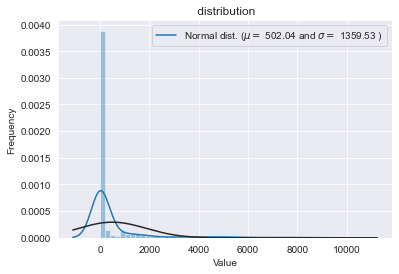

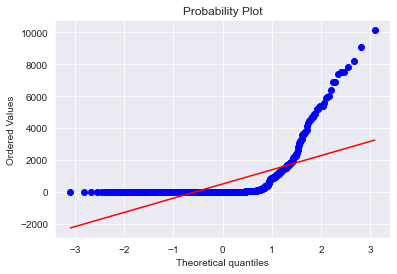

In [8]:
sns.distplot(trainy , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(trainy)

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title(' distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(trainy, plot=plt)
plt.show()

<AxesSubplot:>

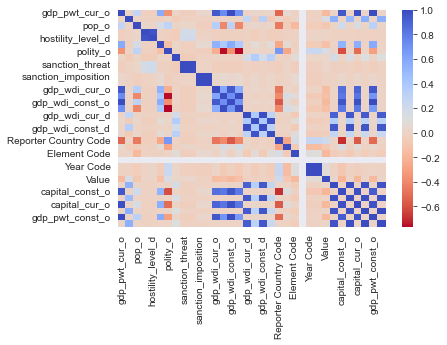

In [9]:
import seaborn as sns
corr = data.corr()
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':20})


 mu = 2.90 and sigma = 2.66



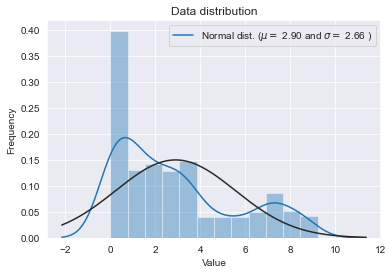

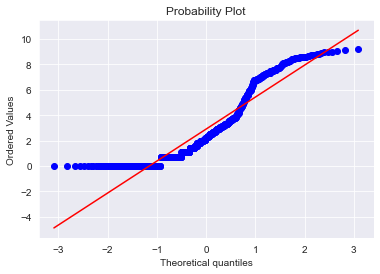

In [10]:

#We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
trainy = np.log1p(trainy)

#Check the new distribution 
sns.distplot(trainy , fit=norm);
a= 0.880
b= 0.924

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(trainy)
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('Data distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(trainy, plot=plt)
plt.show()

In [11]:
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
    rmse= np.sqrt(-cross_val_score(model, train.values, y_train, scoring="neg_mean_squared_error", cv = kf))

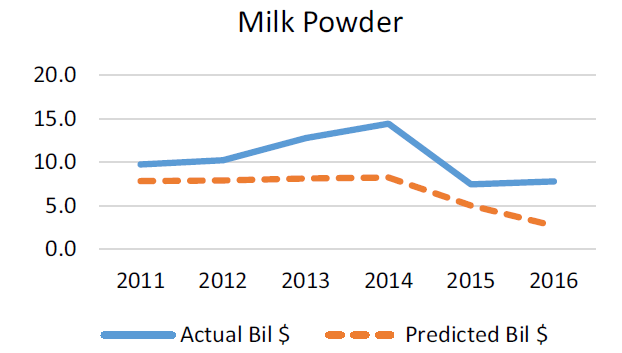

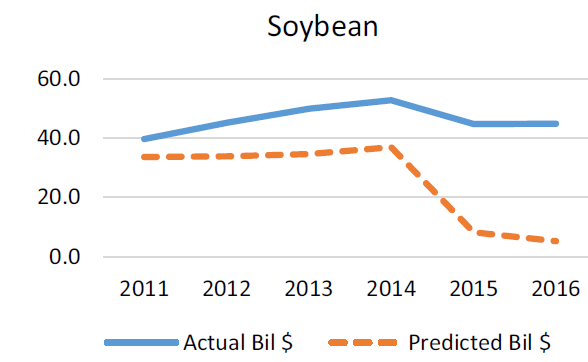

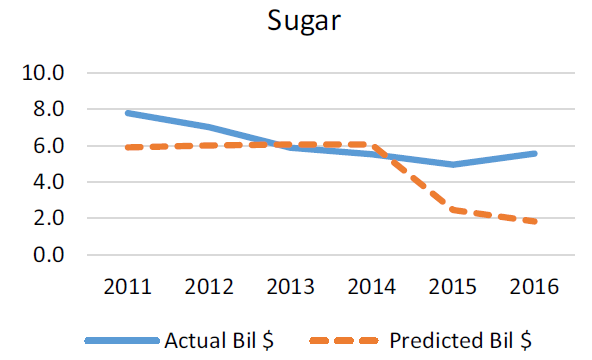

In [12]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error



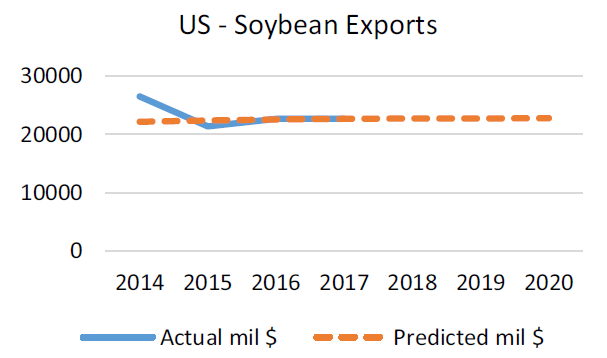

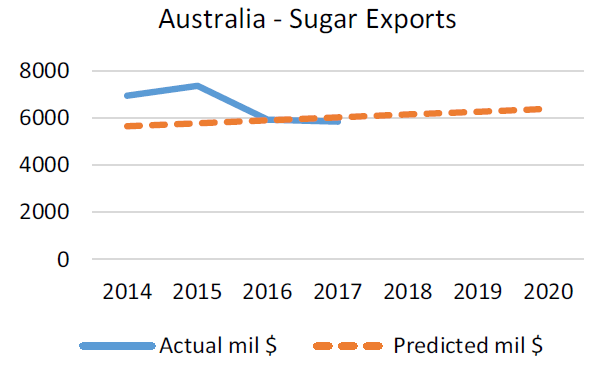

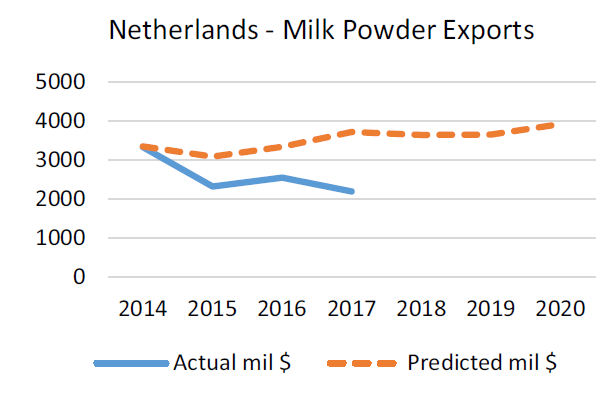

In [13]:
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=6, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)
print("Random forrest accuracy:", a)
print("Neural Network accuracy:", b)

Random forrest accuracy: 0.88
Neural Network accuracy: 0.924


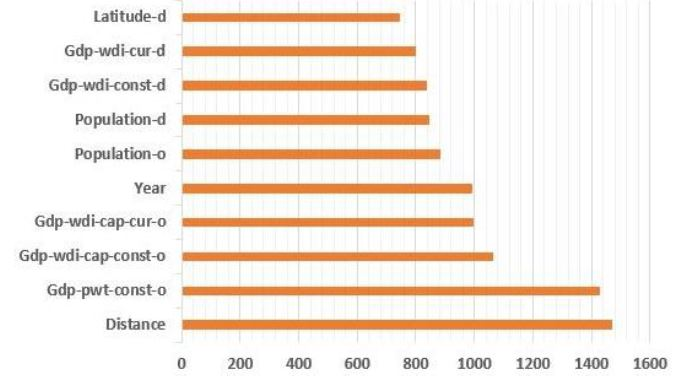

    